In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import scipy.stats as stat

In [2]:
#importations des tables
customers = pd.read_csv("customers.csv", dtype={'sex': 'category'})
products = pd.read_csv("products.csv", dtype={'categ': 'category'})
transactions = pd.read_csv("transactions.csv")

## Mission 1 = nettoyage du jeu de données

In [3]:
#On créé une nouvelle variable sur l'age des clients
customers['age'] = 2022 - customers.birth

In [4]:
#Jointure des 3 tales sur les identifiants produits et clients
ventes = transactions.merge(products, how='left', on='id_prod').merge(customers, how='left', on='client_id')

In [5]:
#On supprime les index de test
ventes = ventes.drop(ventes[ventes.id_prod == 'T_0'].index)

In [6]:
ventes.date = pd.to_datetime(ventes.date)
ventes.sort_values('date',inplace=True)
ventes.set_index('date',inplace=True)

In [7]:
ventes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336816 entries, 2021-03-01 00:01:07.843138 to 2022-02-28 23:59:58.040472
Data columns (total 8 columns):
id_prod       336816 non-null object
session_id    336816 non-null object
client_id     336816 non-null object
price         336713 non-null float64
categ         336713 non-null category
sex           336816 non-null category
birth         336816 non-null int64
age           336816 non-null int64
dtypes: category(2), float64(1), int64(2), object(3)
memory usage: 18.6+ MB


In [8]:
ventes.sort_values(by = 'price', ascending = False).tail(1)

,id_prod,session_id,client_id,price,categ,sex,birth,age
date,,,,,,,,
2022-02-28 18:08:49.875709,0_2245,s_172304,c_4964,NaN,NaN,f,1982,40


In [9]:
ventes[ventes['id_prod']=='0_2245'].count()['id_prod']

103

In [10]:
#On remarque que le produit 0_2245 n'a plus de prix et de categorie associée
#Ce produit a été vendu 103 fois au cours de l'année
#On associe donc la catégorie 0 au produit et le prix médian des produits vendus entre 80 et 120 fois dans l'année
taille = ventes.groupby('id_prod').size()
produit = taille[(taille>80)&(taille<120)].index.values
prix = products[products.id_prod.isin(produit)]['price'].median()
ventes.loc[ventes.id_prod=='0_2245','categ'] = '0'
ventes.loc[ventes.id_prod=='0_2245','price'] = prix

In [11]:
ventes.loc[ventes.id_prod=='0_2245'].head(1)

,id_prod,session_id,client_id,price,categ,sex,birth,age
date,,,,,,,,
2021-03-01 00:09:29.301897,0_2245,s_3,c_580,12.99,0,m,1988,34


In [12]:
ventes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336816 entries, 2021-03-01 00:01:07.843138 to 2022-02-28 23:59:58.040472
Data columns (total 8 columns):
id_prod       336816 non-null object
session_id    336816 non-null object
client_id     336816 non-null object
price         336816 non-null float64
categ         336816 non-null category
sex           336816 non-null category
birth         336816 non-null int64
age           336816 non-null int64
dtypes: category(2), float64(1), int64(2), object(3)
memory usage: 18.6+ MB


In [13]:
ventes.head()

,id_prod,session_id,client_id,price,categ,sex,birth,age
date,,,,,,,,
2021-03-01 00:01:07.843138,0_1259,s_1,c_329,11.99,0,f,1967,55
2021-03-01 00:02:26.047414,0_1390,s_2,c_664,19.37,0,m,1960,62
2021-03-01 00:02:38.311413,0_1352,s_3,c_580,4.50,0,m,1988,34
2021-03-01 00:04:54.559692,0_1458,s_4,c_7912,6.55,0,f,1989,33
2021-03-01 00:05:18.801198,0_1358,s_5,c_2033,16.49,0,f,1956,66


## Mission 2 = analyse des données

In [14]:
#Concaténation des descriptifs des données statistiques de chaque variable principale
pd.concat([ventes.categ.describe(),ventes.id_prod.describe(),
           ventes.client_id.describe(),ventes.sex.describe()],axis=1)

,categ,id_prod,client_id,sex
count,336816,336816,336816,336816
unique,3,3265,8600,2
top,0,1_369,c_1609,m
freq,209529,1081,12855,169241


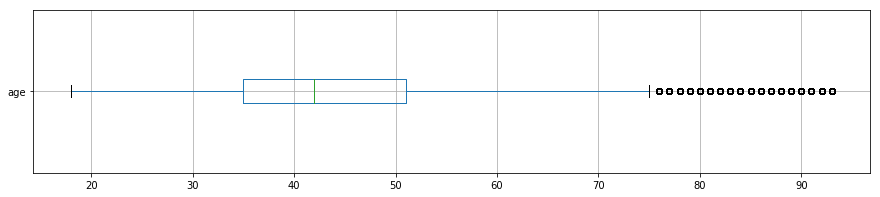

In [15]:
# boxplot de l'age des clients
plt.figure(1, figsize=(15, 3))
ventes.boxplot(column = ['age'], vert = False)

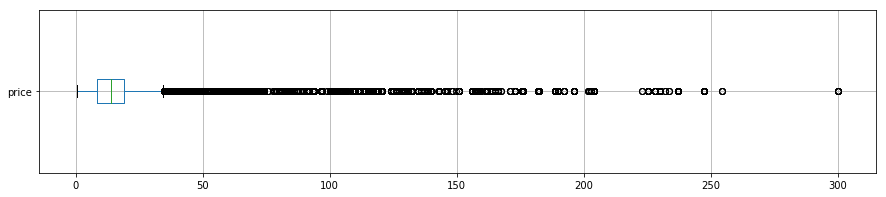

In [16]:
# boxplot des prix
plt.figure(1, figsize=(15, 3))
ventes.boxplot(column = ['price'], vert = False)

In [17]:
age_price = (pd.concat([pd.concat([ventes.price.describe(),ventes.age.describe()],axis=1),
       pd.concat([pd.DataFrame({'skewness':ventes[['price','age']].skew()}).T,
                  pd.DataFrame(({'kurtosis':ventes[['price','age']].kurtosis()})).T]),
                  pd.DataFrame([ventes.price.std()/ventes.price.mean()*100,
                      ventes.age.std()/ventes.age.mean()*100],index=['price','age'],columns=['CV']).T]))
age_price.round(0)

,price,age
count,336816.0,336816.0
mean,17.0,44.0
std,18.0,14.0
min,1.0,18.0
25%,9.0,35.0
50%,14.0,42.0
75%,19.0,51.0
max,300.0,93.0
skewness,5.0,1.0
kurtosis,45.0,0.0


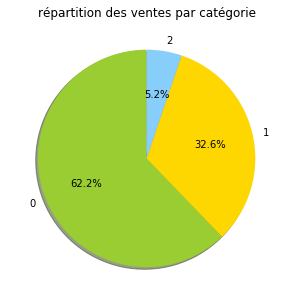

In [18]:
labels = ventes.categ.cat.categories
values = ventes.categ.value_counts()
colors = ['yellowgreen', 'gold', 'lightskyblue']
plt.figure(1, figsize=(5, 5))
plt.title('répartition des ventes par catégorie')
trace = plt.pie(values, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=90)

In [19]:
#On définit une nouvelle variable vpj ou vente par jour
vpj = ventes.id_prod.resample('D').count()

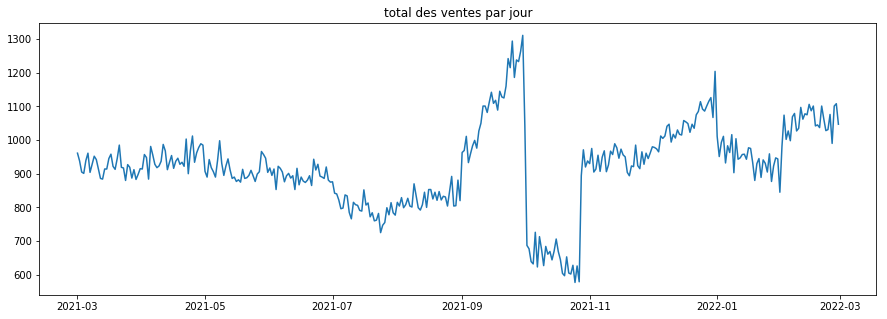

In [20]:
plt.figure(1, figsize=(15, 5))
plt.title('total des ventes par jour')
plt.plot(vpj)

In [21]:
#top 5 des meilleurs clients du site
top5_client = ventes.groupby('client_id').price.sum().nlargest(5).index.tolist()
print(top5_client)

['c_1609', 'c_4958', 'c_6714', 'c_3454', 'c_7959']


In [22]:
#top 5 des articles les plus vendus du site
top5_produit = ventes.groupby('id_prod').id_prod.count().nlargest(5).index.tolist()
print(top5_produit)

['1_369', '1_417', '1_498', '1_414', '1_425']


In [23]:
#top 5 des articles qui rapportent le plus
top5_CA = ventes.groupby('id_prod').price.sum().nlargest(5).index.tolist()
print(top5_CA)

['2_135', '2_112', '2_102', '2_209', '2_110']


In [24]:
indices = pd.DataFrame(columns=['age','price'],index=['lorenz','gini'])
for i in indices.columns:
    indices[i]['lorenz'] = np.append([0],np.cumsum(np.sort(ventes[i])) / ventes[i].sum())
    area_lorenz = np.trapz(indices[i]['lorenz'], dx=5)
    area_perfect = np.trapz(np.linspace(0,1,len(indices[i]['lorenz'])), dx=5)
    indices[i]['gini'] = round((area_perfect - area_lorenz)/area_perfect,2)
pd.DataFrame(indices.loc['gini'])

,gini
age,0.17
price,0.39


C:\Users\alexa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


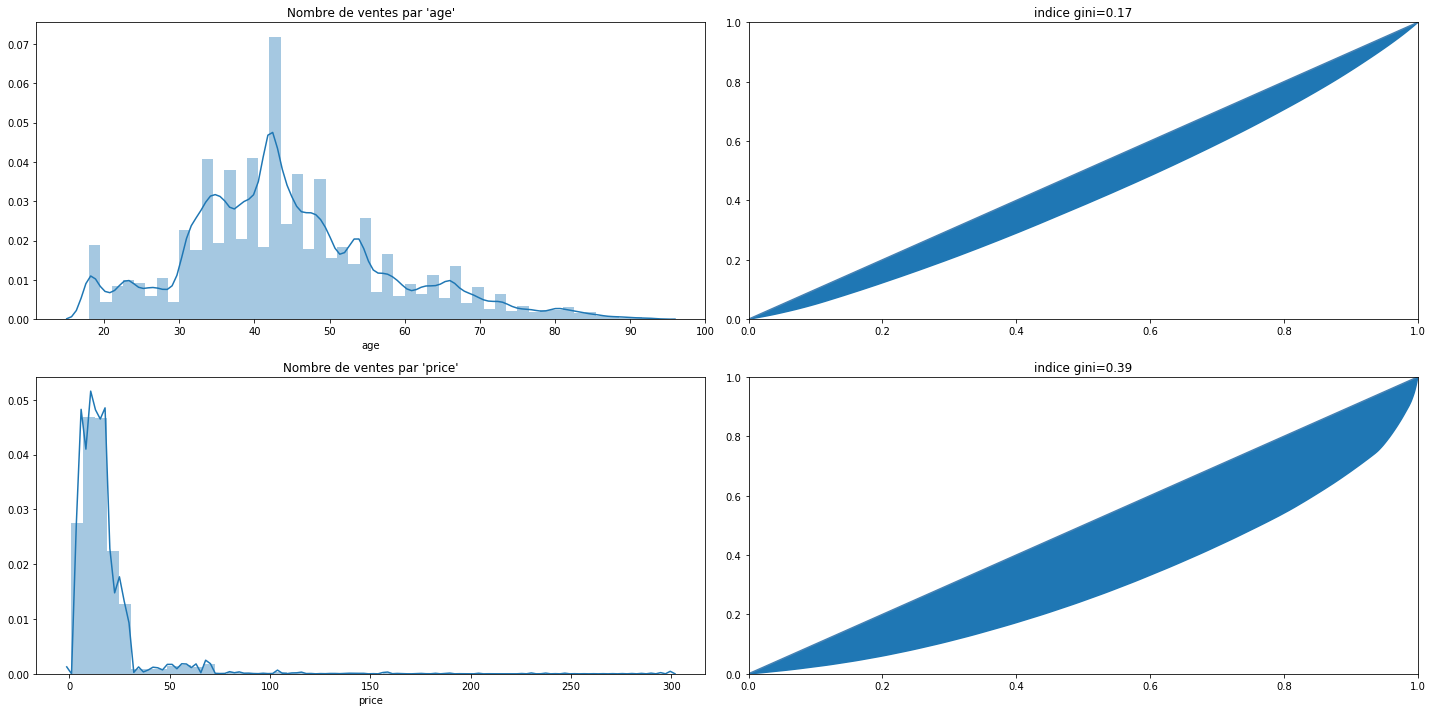

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
for n,i in enumerate(indices.columns):
    lorenz = indices[i]['lorenz']
    gini = indices[i]['gini']
    sns.distplot(ventes[i],ax=axes[n,0])
    axes[n,0].set_title('Nombre de ventes par ' + repr(i))
    axes[n,1].set_xlim(0,1)
    axes[n,1].set_ylim(0,1)
    axes[n,1].plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
    axes[n,1].plot([0,1],color='steelblue')
    axes[n,1].fill_between(np.linspace(0,1,336817),lorenz,np.linspace(0,1,336817))
    axes[n,1].set_title('indice gini='+repr(gini.round(2)))

fig.tight_layout()
plt.show()

In [26]:
M_number = ventes.age[ventes.sex=='m']
F_number = ventes.age[ventes.sex=='f']
tranches = [10,20,30,40,50,60,70,80,90]

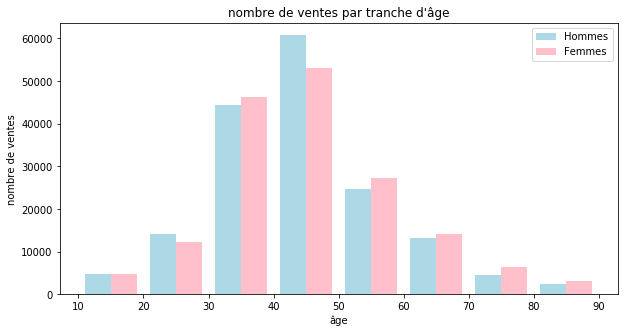

In [27]:
plt.figure(1, figsize=(10, 5))
plt.title("nombre de ventes par tranche d'âge")
plt.hist([M_number, F_number], bins = tranches, color = ['lightblue', 'pink'])
labels = ['Hommes', 'Femmes']
plt.legend(labels)
plt.xlabel('âge')
plt.ylabel('nombre de ventes')
plt.show()

In [28]:
CA = ventes.price.resample('D').sum()

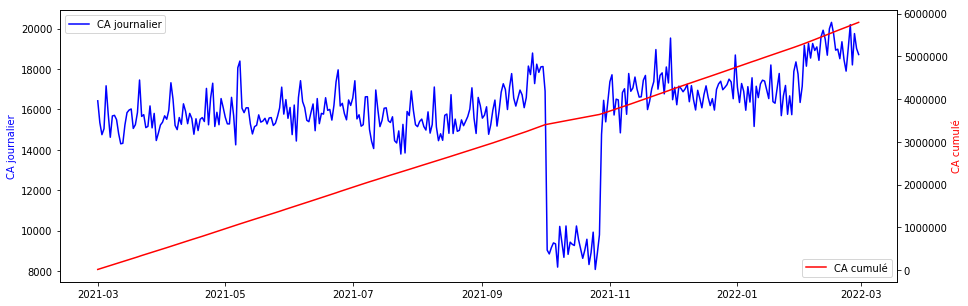

In [29]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(111)
ax1.plot(CA, 'blue', label='CA journalier')
ax1.set_ylabel('CA journalier', color='blue')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(CA.cumsum(), 'red', label='CA cumulé')
ax2.set_ylabel('CA cumulé', color='red')
ax2.legend(loc='lower right')

In [30]:
Categ_0 = ventes.price[ventes.categ=='0'].resample('D').sum()
Categ_1 = ventes.price[ventes.categ=='1'].resample('D').sum()
Categ_2 = ventes.price[ventes.categ=='2'].resample('D').sum()

Text(0, 0.5, 'CA journalier par catégorie')

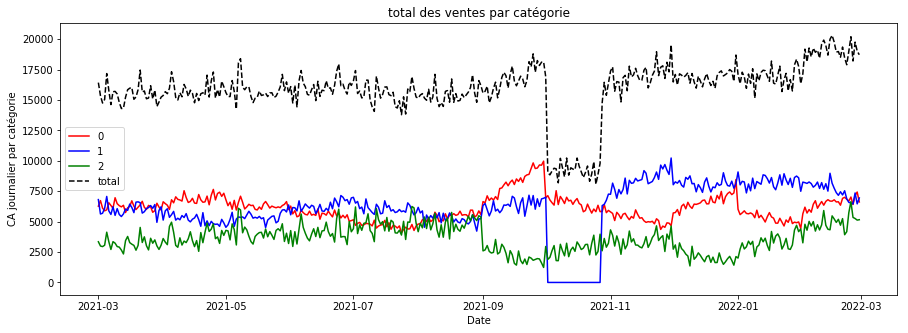

In [31]:
plt.figure(1, figsize=(15, 5))
plt.title('total des ventes par catégorie')
plt.plot(Categ_0, color = 'red')
plt.plot(Categ_1, color = 'blue')
plt.plot(Categ_2, color = 'green')
plt.plot(CA, color = 'black', linestyle = 'dashed')
labels = ['0', '1', '2', 'total']
plt.legend(labels)
plt.xlabel('Date')
plt.ylabel('CA journalier par catégorie')

In [32]:
octobre = ventes[(ventes.index > '2021-10-02') & (ventes.index < '2021-10-28')]

In [33]:
octobre.categ.unique()

[0, 2]
Categories (2, object): [0, 2]

In [34]:
print(octobre.price[ventes.categ == '0'].sum())
print(octobre.price[ventes.categ == '1'].sum())
print(octobre.price[ventes.categ == '2'].sum())

168454.49
0.0
70883.09


Text(0, 0.5, 'CA cumulé')

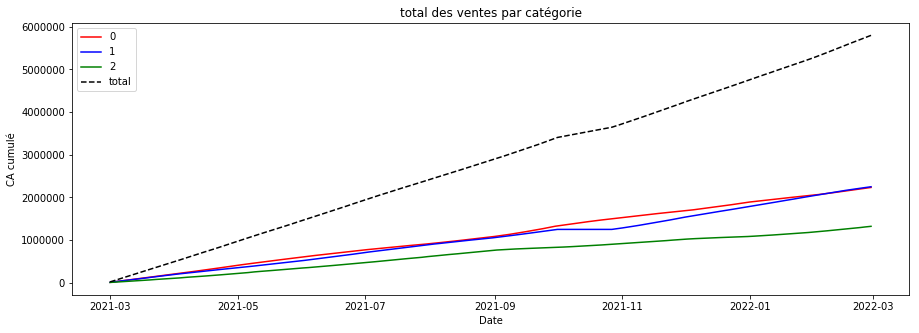

In [35]:
plt.figure(1, figsize=(15, 5))
plt.title('total des ventes par catégorie')
plt.plot(Categ_0.cumsum(), color = 'red')
plt.plot(Categ_1.cumsum(), color = 'blue')
plt.plot(Categ_2.cumsum(), color = 'green')
plt.plot(CA.cumsum(), color = 'black', linestyle = 'dashed')
labels = ['0', '1', '2', 'total']
plt.legend(labels)
plt.xlabel('Date')
plt.ylabel('CA cumulé')

Text(0, 0.5, 'CA')

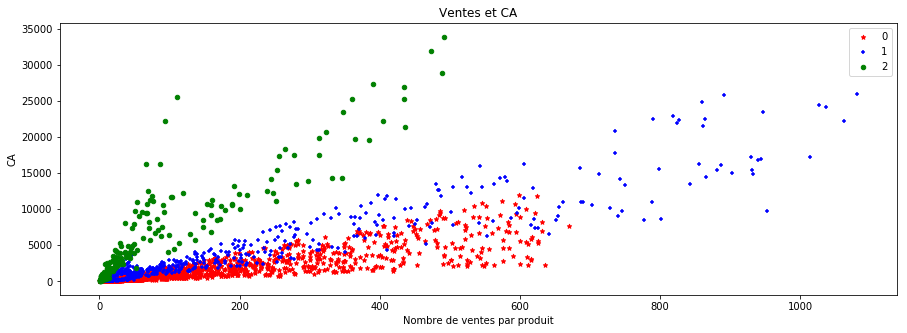

In [36]:
plt.figure(1, figsize=(15, 5))
plt.title('Ventes et CA')
x1_0 = ventes.groupby('id_prod').id_prod.count().filter(like='0_')
x1_1 = ventes.groupby('id_prod').id_prod.count().filter(like='1_')
x1_2 = ventes.groupby('id_prod').id_prod.count().filter(like='2_')
y1_0 = ventes.groupby('id_prod').price.sum().filter(like='0_')
y1_1 = ventes.groupby('id_prod').price.sum().filter(like='1_')
y1_2 = ventes.groupby('id_prod').price.sum().filter(like='2_')
plt.figure(1, figsize=(15, 5))
plt.scatter(x1_0, y1_0, s = 20, color = 'red', marker = '*')
plt.scatter(x1_1, y1_1, s = 20, color = 'blue', marker = '+')
plt.scatter(x1_2, y1_2, s = 20, color = 'green', marker = 'o')
labels = ['0', '1', '2']
plt.legend(labels)
plt.xlabel('Nombre de ventes par produit')
plt.ylabel('CA')

Text(0, 0.5, 'Catégorie')

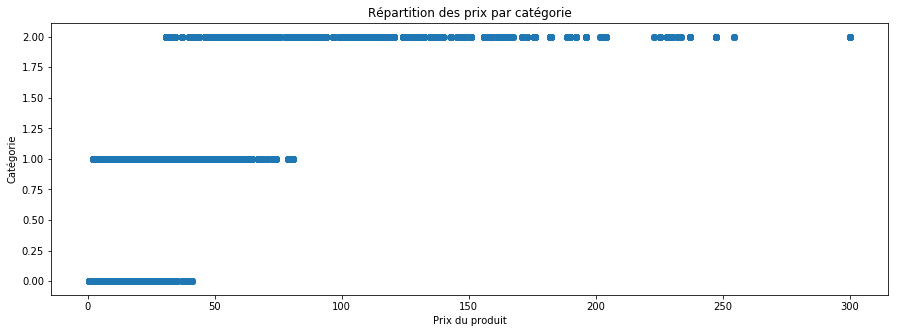

In [37]:
x2 = ventes
y2 = ventes.categ.astype(int)
plt.figure(1, figsize=(15, 5))
plt.title('Répartition des prix par catégorie')
plt.scatter(x2.price, y2)
plt.xlabel('Prix du produit')
plt.ylabel('Catégorie')

Text(0, 0.5, 'CA')

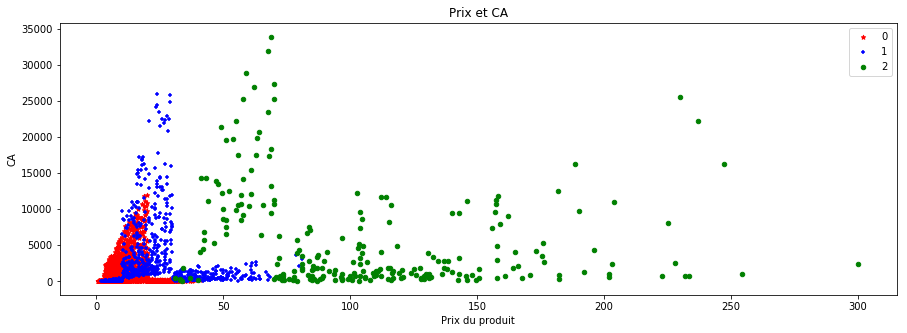

In [38]:
x3_0 = ventes.groupby('id_prod').price.max().filter(like='0_')
x3_1 = ventes.groupby('id_prod').price.max().filter(like='1_')
x3_2 = ventes.groupby('id_prod').price.max().filter(like='2_')
y3_0 = ventes.groupby('id_prod').price.sum().filter(like='0_')
y3_1 = ventes.groupby('id_prod').price.sum().filter(like='1_')
y3_2 = ventes.groupby('id_prod').price.sum().filter(like='2_')
plt.figure(1, figsize=(15, 5))
plt.scatter(x3_0, y3_0, s = 20, color = 'red', marker = '*')
plt.scatter(x3_1, y3_1, s = 20, color = 'blue', marker = '+')
plt.scatter(x3_2, y3_2, s = 20, color = 'green', marker = 'o')
labels = ['0', '1', '2']
plt.legend(labels)
plt.title('Prix et CA')
plt.xlabel('Prix du produit')
plt.ylabel('CA')

Text(0, 0.5, 'Nombre de ventes')

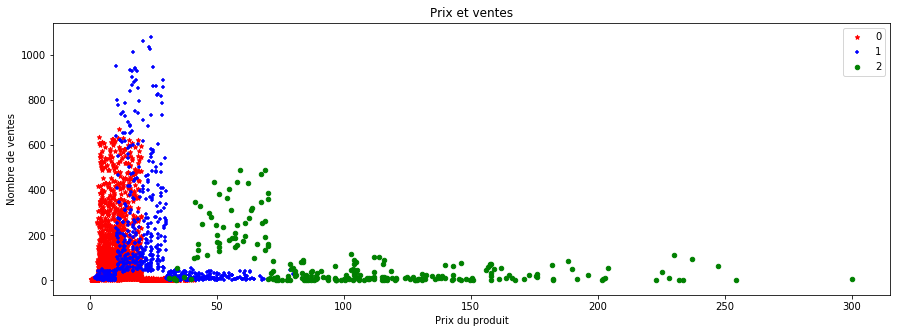

In [39]:
x4_0 = ventes.groupby('id_prod').price.max().filter(like='0_')
x4_1 = ventes.groupby('id_prod').price.max().filter(like='1_')
x4_2 = ventes.groupby('id_prod').price.max().filter(like='2_')
y4_0 = ventes.groupby('id_prod').id_prod.count().filter(like='0_')
y4_1 = ventes.groupby('id_prod').id_prod.count().filter(like='1_')
y4_2 = ventes.groupby('id_prod').id_prod.count().filter(like='2_')
plt.figure(1, figsize=(15, 5))
plt.scatter(x4_0, y4_0, s = 20, color = 'red', marker = '*')
plt.scatter(x4_1, y4_1, s = 20, color = 'blue', marker = '+')
plt.scatter(x4_2, y4_2, s = 20, color = 'green', marker = 'o')
labels = ['0', '1', '2']
plt.legend(labels)
plt.title('Prix et ventes')
plt.xlabel('Prix du produit')
plt.ylabel('Nombre de ventes')

## Mission 3 = Questions

### Corrélation entre sexe et catégorie

In [40]:
Nij = pd.crosstab(ventes.sex,ventes.categ).astype(np.float64)
Nij.columns.name = 'Tableau de contingence (Nij)'
Nij = Nij.reindex(['m','f'])
Nij.round()

Tableau de contingence (Nij),0,1,2
sex,,,
m,105683.0,54266.0,9292.0
f,103846.0,55469.0,8260.0


In [41]:
FiNj = sp.stats.chi2_contingency(Nij)

In [42]:
ar = FiNj[3]

In [43]:
contingency = pd.DataFrame(ar, index = ['m', 'f'], columns = ['0', '1', '2']).round()
contingency.columns.name = "Tableau d'indépendance (Fi x Nj)"

In [44]:
contingency

Tableau d'indépendance (Fi x Nj),0,1,2
m,105283.0,55139.0,8819.0
f,104246.0,54596.0,8733.0


In [45]:
khi = (Nij-ar)**2/ar
khi.columns.name = 'Mesure du khi-2 (ξij)'
khi.round()

Mesure du khi-2 (ξij),0,1,2
sex,,,
m,2.0,14.0,25.0
f,2.0,14.0,26.0


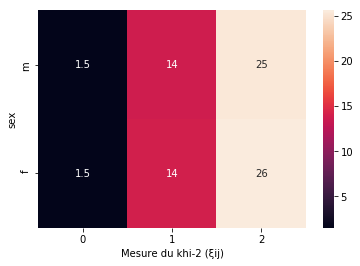

In [46]:
sns.heatmap(khi, annot=True)

On définit H0:la distribution observée est significativement différente de la distribution théorique 

In [67]:
print('le test khi-2 global présente une statistique de',FiNj[0].round(2))
print('et une p-value de',FiNj[1],'inférieure à alpha = 0.05%')
print("l'hypothèse nulle est rejetée, il existe une coorélation entre le sexe et la catégorie de produit")

le test khi-2 global présente une statistique de 81.73
et une p-value de 1.7857752515034613e-18 inférieure à alpha = 0.05%
l'hypothèse nulle est rejetée, il existe une coorélation entre le sexe et la catégorie de produit


### Corrélation entre age et montant des achats

In [48]:
age_montant = ventes.groupby('age').price.sum()
stat_AM = {'pearson' : sp.stats.pearsonr(age_montant,age_montant.index),
          'ANOVA' : sp.stats.f_oneway(age_montant,age_montant.index)}
pd.DataFrame(stat_AM).round(2).rename(index={0:'Valeur du test',1:'P-Value'})

,pearson,ANOVA
Valeur du test,-0.77,105.91
P-Value,0.00,0.00


In [49]:
montant = ventes.groupby('age').price.sum()
slope, intercept, r_value, p_value, std_err = sp.stats.linregress(montant.index,montant)
line = slope*montant.index+intercept

le modèle linéaire est de la forme : y = ax + b
et a = -2265.2620503076155
avec b = 202010.40879207384
et un R² de  0.6000541961960475


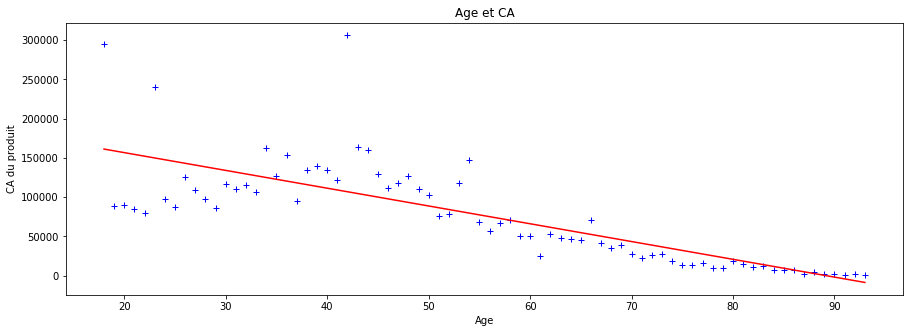

In [50]:
plt.figure(1, figsize=(15, 5))
plt.plot(montant.index, montant, color = 'blue', marker = '+', linestyle = 'none')
plt.plot(montant.index, line, color = 'red')
plt.title('Age et CA')
plt.xlabel('Age')
plt.ylabel('CA du produit')
print('le modèle linéaire est de la forme : y = ax + b')
print('et a =',slope)
print('avec b =', intercept)
print('et un R² de ', r_value**2)

In [51]:
#Possibilité d'avoir deux tendances à l'age médian de 44 ans
#On supprime les valeurs abbérantes de CA > 200000 avant 44 ans
b44 = montant[(montant.index <= 44) & (montant < 200000)]
a44 = montant[montant.index > 44]

In [52]:
slopeb44, interceptb44, r_valueb44, p_valueb44, std_errb44 = sp.stats.linregress(b44.index,b44)
slopea44, intercepta44, r_valuea44, p_valuea44, std_erra44 = sp.stats.linregress(a44.index,a44)
lineb44 = slopeb44*b44.index+interceptb44
linea44 = slopea44*a44.index+intercepta44

série avant 44 ans : R² = 0.623516790217645
série après 44 ans : R² = 0.8239722597606237


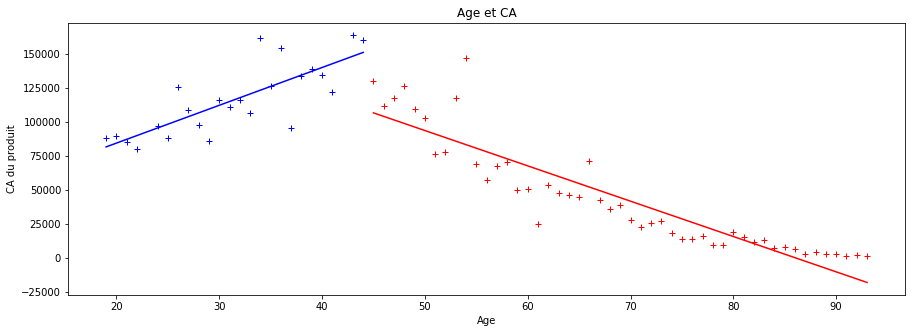

In [53]:
plt.figure(1, figsize=(15, 5))
plt.plot(b44.index, b44, color = 'blue', marker = '+', linestyle = 'none')
plt.plot(a44.index, a44, color = 'red', marker = '+', linestyle = 'none')
plt.plot(b44.index, lineb44, color = 'blue')
plt.plot(a44.index, linea44, color = 'red')
plt.title('Age et CA')
plt.xlabel('Age')
plt.ylabel('CA du produit')
print('série avant 44 ans : R² =', r_valueb44**2)
print('série après 44 ans : R² =', r_valuea44**2)

In [54]:
stat_b44 = {'pearson' : sp.stats.pearsonr(b44,b44.index),
          'ANOVA' : sp.stats.f_oneway(b44,b44.index)}
pd.DataFrame(stat_b44).round(2).rename(index={0:'Valeur du test',1:'P-Value'})

,pearson,ANOVA
Valeur du test,0.79,468.25
P-Value,0.00,0.00


In [55]:
stat_a44 = {'pearson' : sp.stats.pearsonr(a44,a44.index),
          'ANOVA' : sp.stats.f_oneway(a44,a44.index)}
pd.DataFrame(stat_a44).round(2).rename(index={0:'Valeur du test',1:'P-Value'})

,pearson,ANOVA
Valeur du test,-0.91,57.0
P-Value,0.00,0.0


### Corrélation entre age et fréquence d'achat

In [56]:
frequence = ventes.groupby('age').id_prod.count()
slope2, intercept2, r_value2, p_value2, std_err2 = sp.stats.linregress(frequence.index,frequence)
line2 = slope2*frequence.index+intercept2

le modèle linéaire est de la forme : y = ax + b
et a = -104.2761722488038
avec b = 10219.117033492821
et un R² de  0.2801137349989304


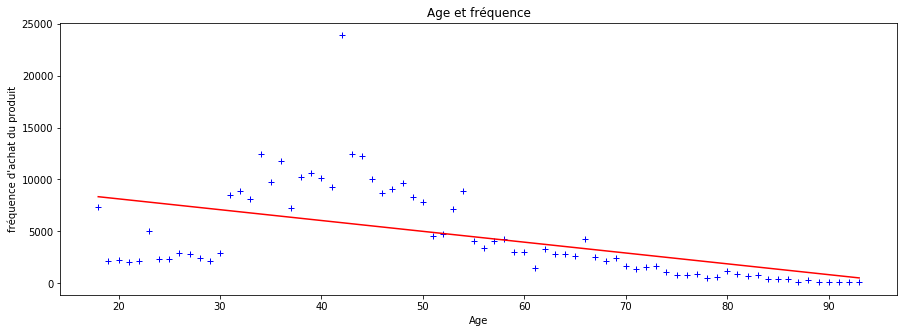

In [57]:
plt.figure(1, figsize=(15, 5))
plt.plot(frequence.index, frequence, color = 'blue', marker = '+', linestyle = 'none')
plt.plot(frequence.index, line2, color = 'red')
plt.title('Age et fréquence')
plt.xlabel('Age')
plt.ylabel("fréquence d'achat du produit")
print('le modèle linéaire est de la forme : y = ax + b')
print('et a =',slope2)
print('avec b =', intercept2)
print('et un R² de ', r_value2**2)

In [58]:
stat_freq = {'pearson' : sp.stats.pearsonr(frequence,frequence.index),
          'ANOVA' : sp.stats.f_oneway(frequence,frequence.index)}
pd.DataFrame(stat_freq).round(2).rename(index={0:'Valeur du test',1:'P-Value'})

,pearson,ANOVA
Valeur du test,-0.53,76.89
P-Value,0.00,0.00


In [59]:
a30 = frequence[(frequence.index > 30) & (frequence < 15000)]

In [60]:
slopea30, intercepta30, r_valuea30, p_valuea30, std_erra30 = sp.stats.linregress(a30.index,a30)
linea30 = slopea30*a30.index+intercepta30

le modèle linéaire est de la forme : y = ax + b
et a = -201.23136742094007
avec b = 16960.709737330842
et un R² de  0.8380345182608605


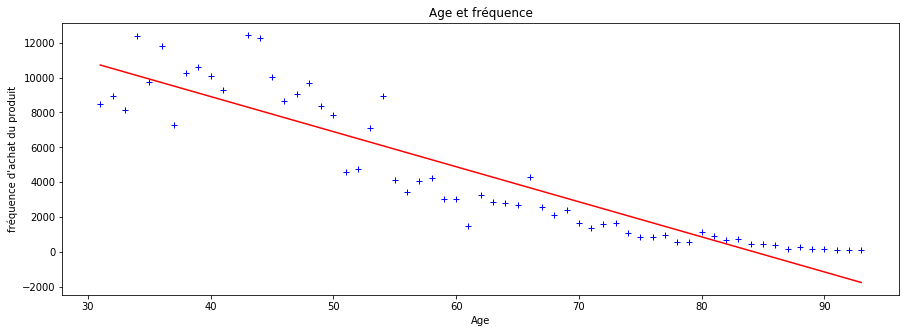

In [61]:
plt.figure(1, figsize=(15, 5))
plt.plot(a30.index, a30, color = 'blue', marker = '+', linestyle = 'none')
plt.plot(a30.index, linea30, color = 'red')
plt.title('Age et fréquence')
plt.xlabel('Age')
plt.ylabel("fréquence d'achat du produit")
print('le modèle linéaire est de la forme : y = ax + b')
print('et a =',slopea30)
print('avec b =', intercepta30)
print('et un R² de ', r_valuea30**2)

In [62]:
stat_a30 = {'pearson' : sp.stats.pearsonr(a30,a30.index),
          'ANOVA' : sp.stats.f_oneway(a30,a30.index)}
pd.DataFrame(stat_a30).round(2).rename(index={0:'Valeur du test',1:'P-Value'})

,pearson,ANOVA
Valeur du test,-0.92,72.75
P-Value,0.00,0.00


### Corrélation entre age et panier moyen

In [63]:
panier = ventes.groupby(['age','session_id']).id_prod.count()
panier = pd.DataFrame(panier).swaplevel(0, 1, axis=0).reset_index()
panier = panier.groupby('age').id_prod.mean().round(1)
slope3, intercept3, r_value3, p_value3, std_err3 = sp.stats.linregress(panier.index,panier)
line3 = slope3*panier.index+intercept3

le modèle linéaire est de la forme : y = ax + b
et a = -0.010962406015037594
avec b = 2.362360902255639
et un R² de  0.3394423677957022


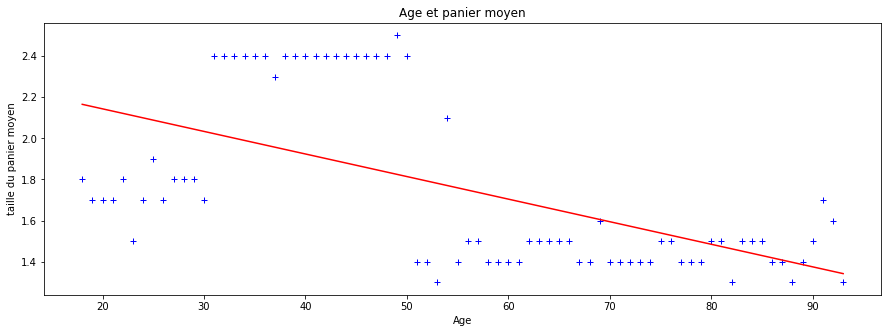

In [64]:
plt.figure(1, figsize=(15, 5))
plt.plot(panier.index, panier, color = 'blue', marker = '+', linestyle = 'none')
plt.plot(panier.index, line3, color = 'red')
plt.title('Age et panier moyen')
plt.xlabel('Age')
plt.ylabel("taille du panier moyen")
print('le modèle linéaire est de la forme : y = ax + b')
print('et a =',slope3)
print('avec b =', intercept3)
print('et un R² de ', r_value3**2)

In [65]:
stat_panier = {'pearson' : sp.stats.pearsonr(panier,panier.index),
          'ANOVA' : sp.stats.f_oneway(panier,panier.index)}
pd.DataFrame(stat_panier).round(2).rename(index={0:'Valeur du test',1:'P-Value'})

,pearson,ANOVA
Valeur du test,-0.58,450.02
P-Value,0.00,0.00


### Corrélation entre age et catégorie de produit

In [66]:
#ANOVA à 1 facteur - comparaison des moyennes - paramétrique
#H0 = hypothèse nulle = les deux variables sont corrélées
#H1 = hypothèse non-nulle = les deux variables ne sont pas corrélées
print(stat.f_oneway(ventes.categ,ventes.age))
print("H0 est rejetée, il n'y a pas de corrélation entre les 2 variables")

F_onewayResult(statistic=3517603.29575519, pvalue=0.0)
H0 est rejetée, il n'y a pas de corrélation entre les 2 variables
